## 特征匹配
### Brute-Force蛮力匹配

In [1]:
import cv2
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
img1 = cv2.imread("E:\\opencv\\picture feature\\box.png", 0)
img2 = cv2.imread("E:\\opencv\\picture feature\\box_in_scene.png", 0)

In [3]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
cv_show("img1", img1)
cv_show("img2", img2)

In [5]:
sift = cv2.SIFT_create()

In [6]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [7]:
#crossCheck表示两个特征点相互匹配，例如A中第i个特征点与与B中第j个特征点最近的，并且B中第j个特征点A中第i个特征点也是
#NORM_L2：归一化数组的（欧几里德距离），如果其他特征计算方法需要考虑不同的匹配计算方法
bf = cv2.BFMatcher(crossCheck=True)

### 1对1的匹配

In [8]:
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

In [9]:
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)

In [10]:
cv_show("img3", img3)

### k对最佳匹配

In [11]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [12]:
good = []
for m, n in matches:
    if m.distance <0.75 * n.distance:
        good.append([m])

In [13]:
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

In [14]:
cv_show("img3", img3)

如果需要更快速完成操作，可以尝试使用cv2.FlannBasedMatcher

### 随机抽样一致算法
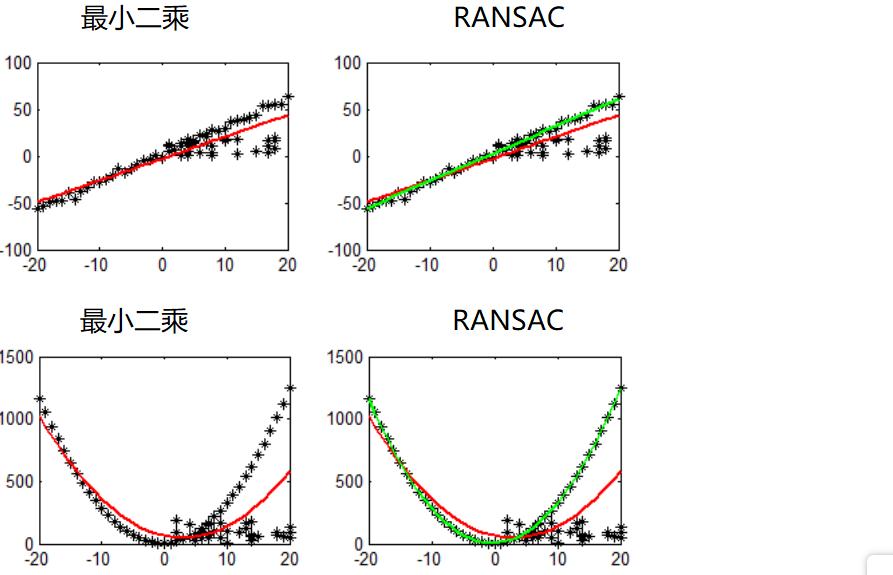


选择初始样本点进行拟合，给定一个容忍范围，不断进行迭代
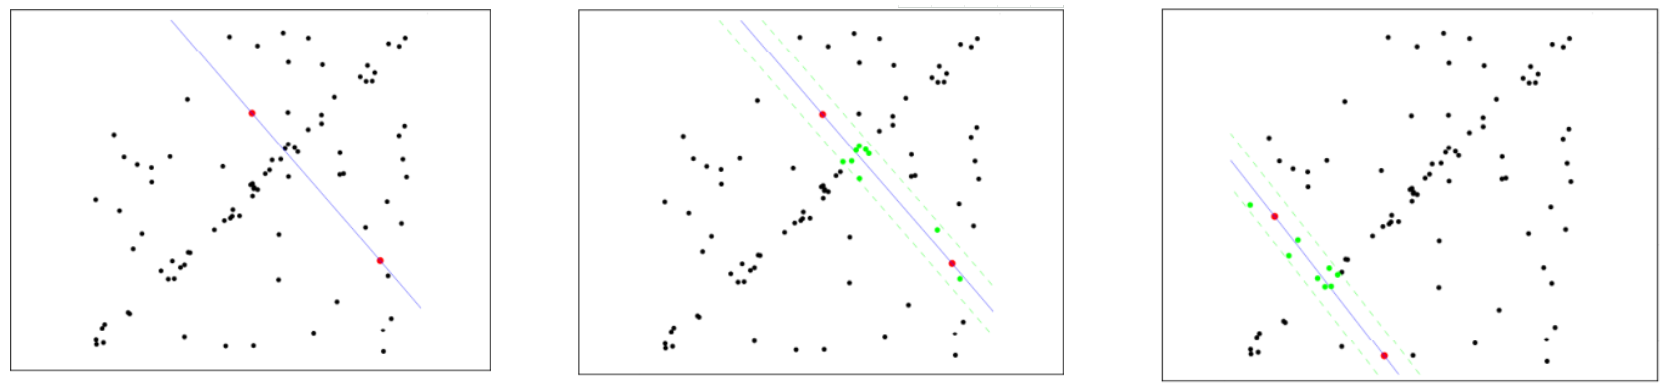

每次拟合后，容差范围内都有对应的数据点数，找出数据点最多的情况，就是最终的拟合结果
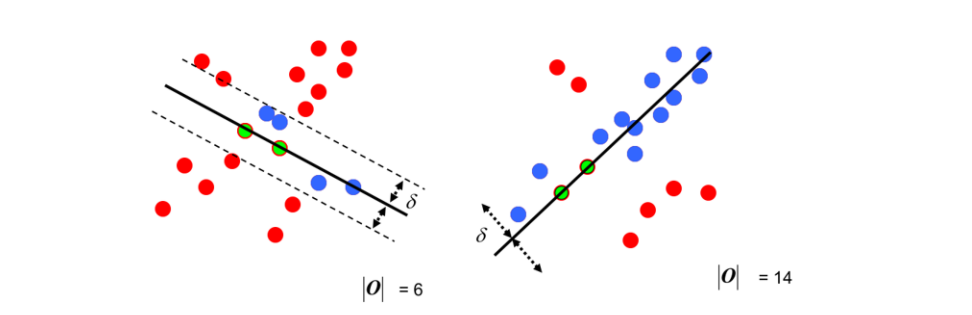

### 单应性矩阵
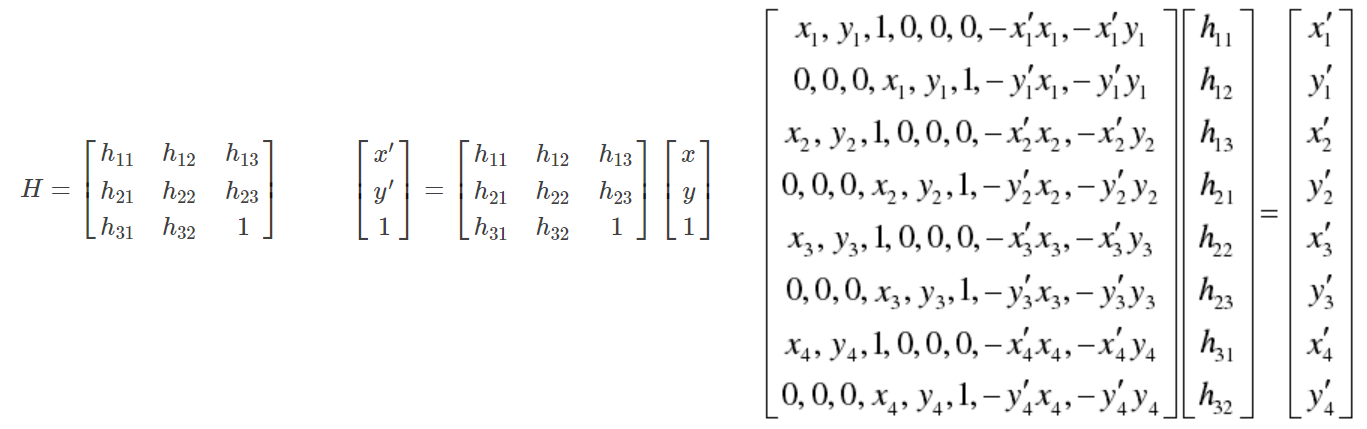